Задача.

Во вложениитестовые данные и описание полей.
Некоторые данные уже агрегированы, но если нужно сделать дополнительные переменные, Вы не ограничены в своей фантазии.

Опишите, пожалуйста, предоставленную Вам выборку.
Опишите клиентов в выборке  - пол, возраст, размер города, доходы, траты , срок жизни в банке с использованием графиков. Кластеризуйте данные и опишите кластера (бизнес языком).
Это клиенты с таким-то поведением и/или продуктовым наполнением.	доход от клиента без OPEX



# 1.EDA

In [53]:
import pandas as pd
import numpy as np

import umap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
import hdbscan

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/Users/gor/PycharmProjects/Задание_2_test_cluster.csv', sep=';', encoding='cp1251')

In [6]:
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [52]:
df.shape

(50000, 28)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

In [56]:
df.describe()

,age,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
count,50000.000000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,5.000000e+04,5.000000e+04,...,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,3820.000000,3.212800e+04,3.151500e+04,4.756900e+04
mean,41.524480,53.642820,1.288144e+04,6.033691e+04,8.126498e+04,7.002303e+04,6.860816e+04,105.011400,2.207407e+05,2.600832e+04,...,7.534701e+04,8.875132e+04,7.891208e+04,5.556172e+04,6.509508e+04,5.534414e+04,18.236559,5.279361e+03,3.384532e+02,1.205378e+04
std,12.866034,47.430416,1.874505e+05,2.017564e+05,2.860175e+05,1.679410e+06,1.748867e+06,192.687683,6.008022e+05,4.359979e+05,...,2.758174e+05,3.004066e+05,2.749138e+05,1.896891e+05,2.113224e+05,1.725155e+05,269.329001,1.598972e+04,2.936955e+04,4.532125e+04
min,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.684957e-04
25%,32.000000,13.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.400000e+01,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,8.143703e+02,8.005211e-02,2.695975e+02
50%,40.000000,37.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.600000e+02,14.000000,3.500108e+04,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.716181e+03,3.017687e-01,1.379604e+03
75%,51.000000,81.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.762365e+03,122.000000,2.603239e+05,3.162002e+04,...,0.000000e+00,0.000000e+00,3.868709e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,4.416583e+03,1.532015e+00,9.781835e+03
max,98.000000,236.000000,1.467568e+07,7.354568e+06,1.467568e+07,3.305000e+08,2.474474e+08,2970.000000,3.634105e+07,9.060000e+07,...,1.467568e+07,1.481199e+07,1.502391e+07,5.646888e+06,7.501889e+06,4.112823e+06,12521.279170,1.749500e+06,5.000000e+06,4.691796e+06


## Рапределения и зависимости данных

In [59]:
df['gender'].value_counts(dropna=False)

gender
М      25403
F      23874
NaN      723
Name: count, dtype: int64

In [60]:
# Пол распределен 50\50, пропусков почти нет.

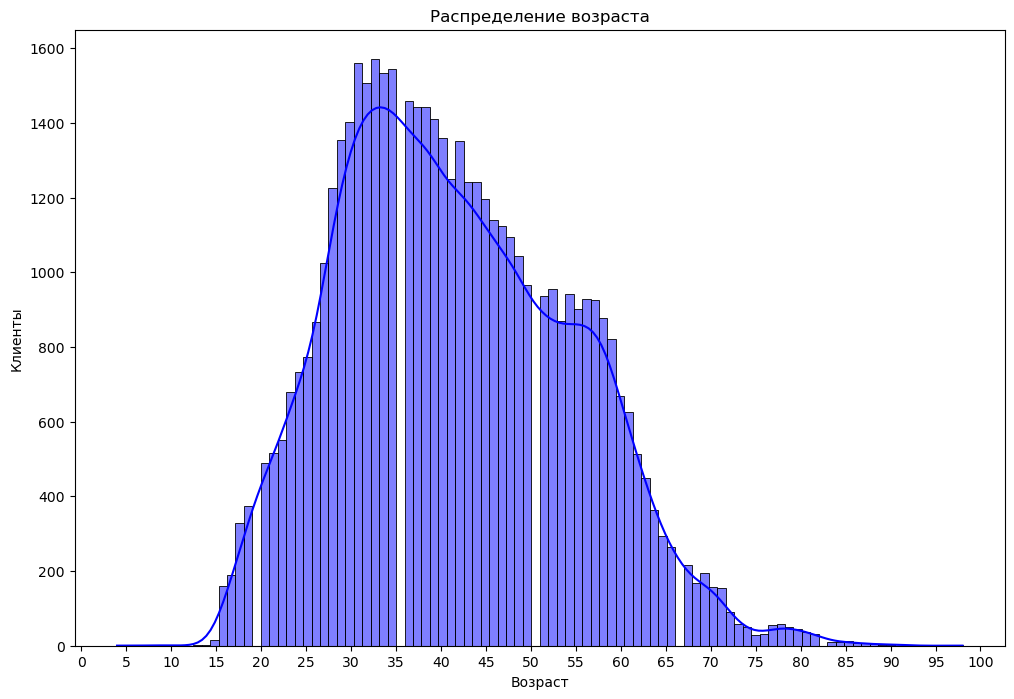

In [61]:
# Построение гистограммы
plt.figure(figsize=(12, 8))

sns.histplot(data=df, x='age', bins=100, kde=True, color='blue')

plt.xticks(ticks=range(0, 101, 5))

plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Клиенты')
plt.show()

Города

In [64]:
df.city_type.unique()

array(['<100', 'Mega', '100-500', '1M+', '500-1000'], dtype=object)

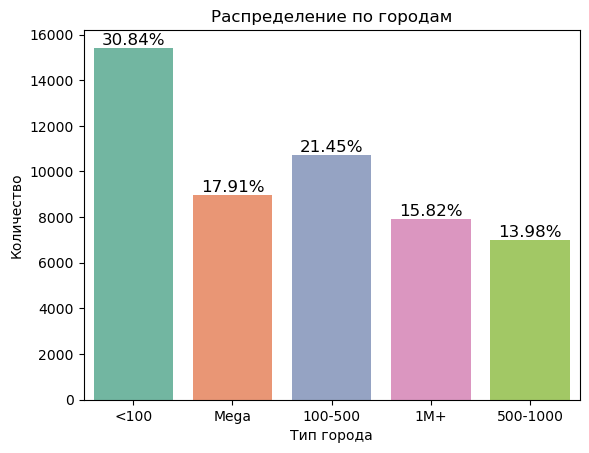

In [66]:
percent_data = df['city_type'].value_counts() / df['city_type'].value_counts().sum() * 100
ax = sns.countplot(x='city_type', data=df, palette='Set2')

for p in ax.patches:
    height = p.get_height()
    percentage = (height / len(df)) * 100
    ax.text(p.get_x() + p.get_width() / 2, height + 10, f'{percentage:.2f}%',
            ha='center', va='bottom', fontsize=12)

plt.title('Распределение по городам')
plt.xlabel('Тип города')
plt.ylabel('Количество')
plt.show()

In [67]:
# Треть клиентов с городов миллиоников. Как видно на графике ,наши клиенты в большей своей части из небольших городских поселений.

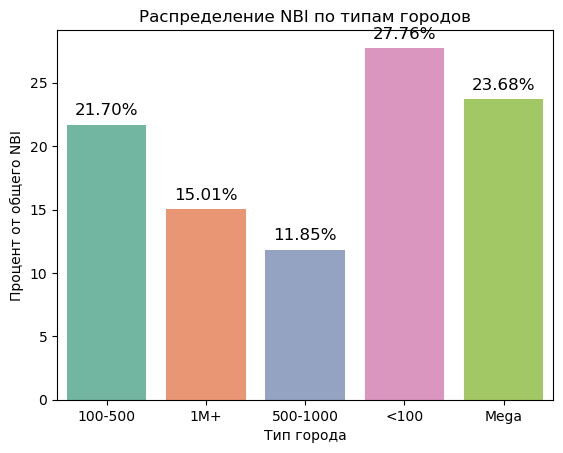

In [68]:
city_nbi_sum = df.groupby('city_type')['nbi'].sum()
nbi_total = city_nbi_sum.sum()
city_nbi_percent = (city_nbi_sum / nbi_total) * 100


ax = sns.barplot(x=city_nbi_percent.index, y=city_nbi_percent.values, palette='Set2')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height:.2f}%',
            ha='center', va='bottom', fontsize=12)

plt.title('Распределение NBI по типам городов')
plt.xlabel('Тип города')
plt.ylabel('Процент от общего NBI')
plt.show()


In [69]:
df.groupby(['city_type','gender'])['gender'].count()
# Распр. по типам нас. пунктов и гендеру

city_type  gender
100-500    F         5291
           М         5369
1M+        F         4063
           М         3784
500-1000   F         3297
           М         3629
<100       F         7048
           М         8163
Mega       F         4175
           М         4458
Name: gender, dtype: int64

In [70]:
# Длительность взаимоотношений с банком

In [71]:
df.full_mob.describe()

count    50000.000000
mean        53.642820
std         47.430416
min          0.000000
25%         13.000000
50%         37.000000
75%         81.000000
max        236.000000
Name: full_mob, dtype: float64

In [72]:
# в среднем клиенты взаиодействую с банком 53 у.е.(дня?!? в данных не раскрато описание колонки)

In [73]:
df.query('full_mob==0').shape

(463, 28)

In [75]:
# 463  клиента с 0 по времени коммуникации с банком.

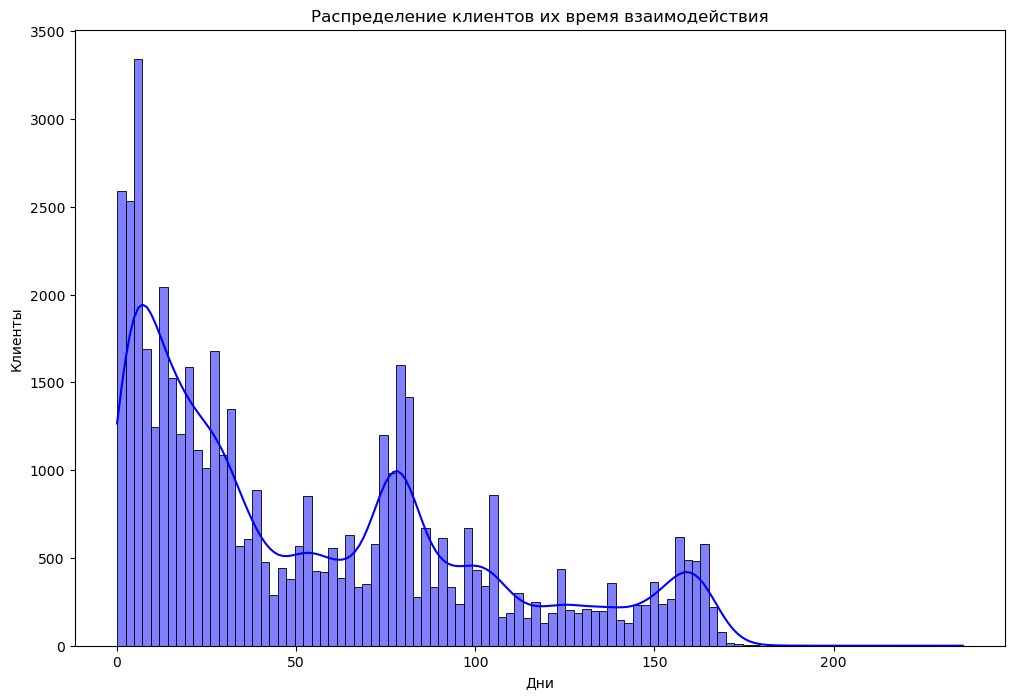

In [77]:
# Построение гистограммы
plt.figure(figsize=(12, 8))

sns.histplot(data=df, x='full_mob', bins=100, kde=True, color='blue')


plt.title('Распределение клиентов их время взаимодействия')
plt.xlabel('Дни')
plt.ylabel('Клиенты')
plt.show()

In [78]:
#По графику видно 3 сегмента, которые явно выделяются на фоне основного распределения

In [80]:
df.income.isnull().sum()

0

In [82]:
df.query('income > 0').shape
# 23т. клиентов приносят положительный доход

(23219, 28)

In [83]:
df.income.sort_values(ascending=False).head(10)
# Прослеживаются клиенты с огромных доход , которые явно отведем в отдельную категорию

45169    90600000.00
8315     33063482.00
23233     5000000.00
22278     4107734.49
9017      3216499.65
32833     2704759.32
35277     2085463.50
14370     1986743.50
1327      1900000.00
26002     1634281.53
Name: income, dtype: float64

In [87]:
df.query('income > 1000000').shape
# 24 клинета с доходом более 1 млн

(24, 28)

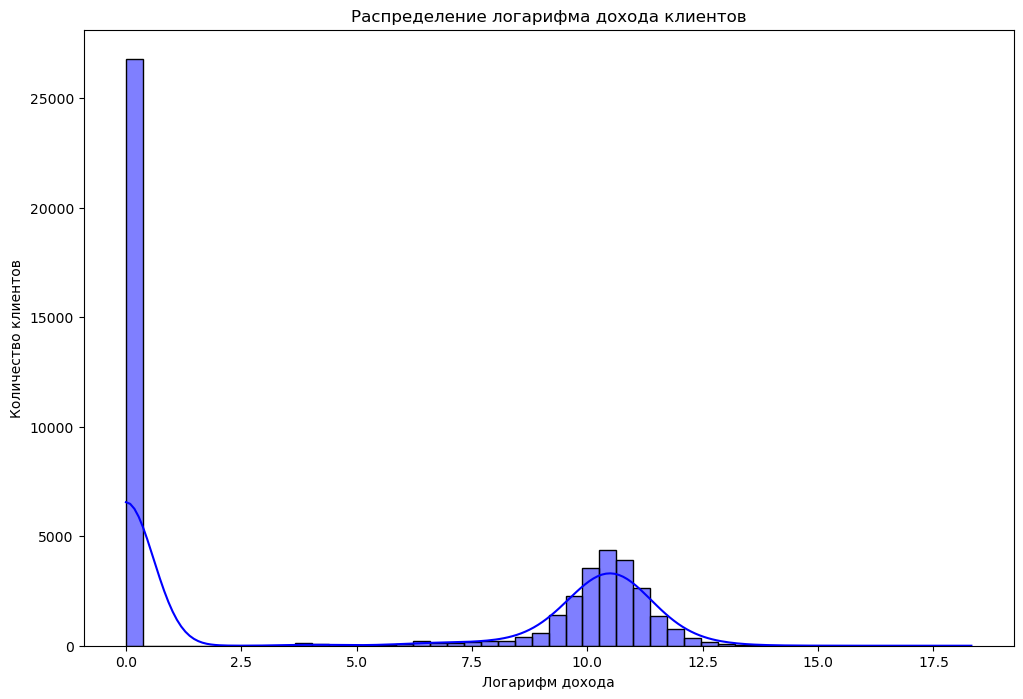

In [8]:
#Использование нормального распределения логарифма дохода позволяет эффективно сегментировать клиентов
df['log_income'] = np.log(df['income'] + 1)

plt.figure(figsize=(12, 8))

sns.histplot(data=df, x='log_income', bins=50, kde=True, color='blue')

plt.title('Распределение логарифма дохода клиентов')
plt.xlabel('Логарифм дохода')
plt.ylabel('Количество клиентов')
plt.show()

In [10]:
df.columns

Index(['age', 'gender', 'city_type', 'full_mob', 'ml_balance', 'cl_balance_0m',
       'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m', 'dc_trx_cnt',
       'dc_trx_sum', 'income', 'min_casa_balance_1q', 'max_casa_balance_1q',
       'avg_casa_balance_1Y', 'min_td_balance_1q', 'max_td_balance_1q',
       'avg_td_balance_1Y', 'min_loan_balance_1q', 'max_loan_balance_1q',
       'avg_loan_balance_1Y', 'min_cl_balance_1q', 'max_cl_balance_1q',
       'avg_cl_balance_1Y', 'loan_to_deposit', 'Avg_trx', 'avgtrx_to_balance',
       'nbi', 'log_income'],
      dtype='object')

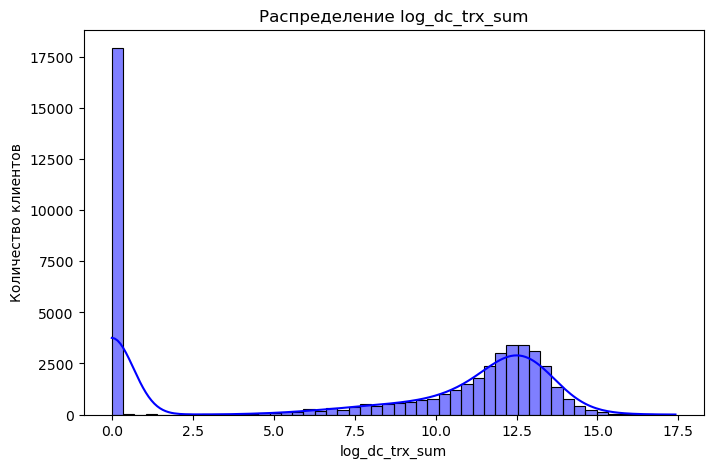

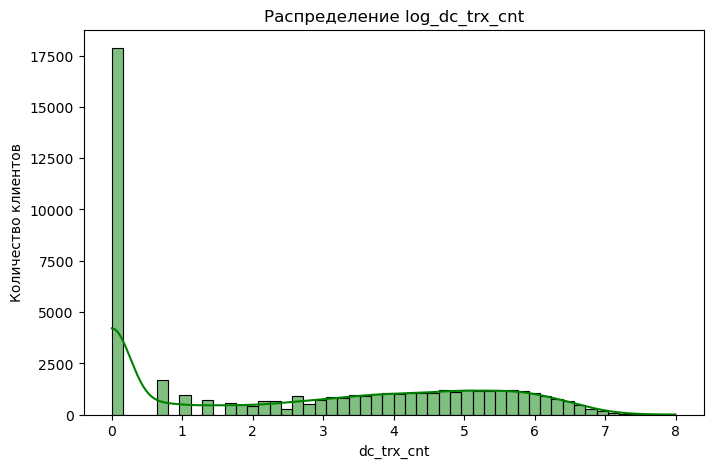

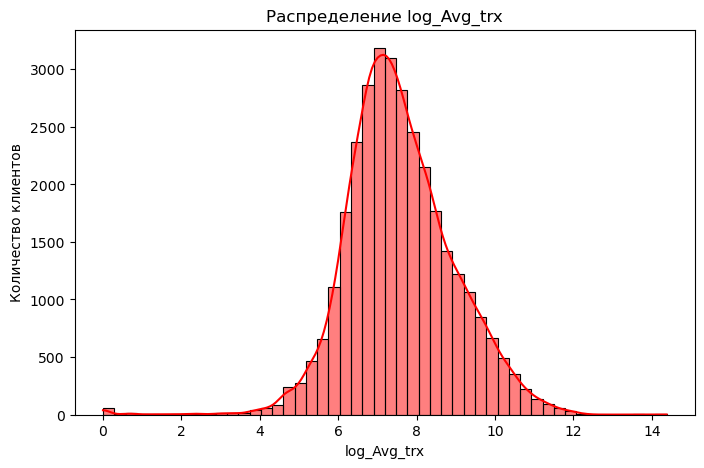

In [12]:
df['log_dc_trx_sum'] = np.log(df['dc_trx_sum'] + 1)
df['log_Avg_trx'] = np.log(df['Avg_trx'] + 1)
df['log_dc_trx_cnt'] = np.log(df['dc_trx_cnt'] + 1)

# Распределение log_dc_trx_sum
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='log_dc_trx_sum', bins=50, kde=True, color='blue')
plt.title('Распределение log_dc_trx_sum')
plt.xlabel('log_dc_trx_sum')
plt.ylabel('Количество клиентов')
plt.show()

# Распределение log_dc_trx_cnt
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='log_dc_trx_cnt', bins=50, kde=True, color='green')
plt.title('Распределение log_dc_trx_cnt')
plt.xlabel('dc_trx_cnt')
plt.ylabel('Количество клиентов')
plt.show()

# Распределение log_Avg_trx
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='log_Avg_trx', bins=50, kde=True, color='red')
plt.title('Распределение log_Avg_trx')
plt.xlabel('log_Avg_trx')
plt.ylabel('Количество клиентов')
plt.show()


In [14]:
# По количеству и сумме транзакуций есть явные группы 0 , логарифм на "средний чек" имеет норм. распр.

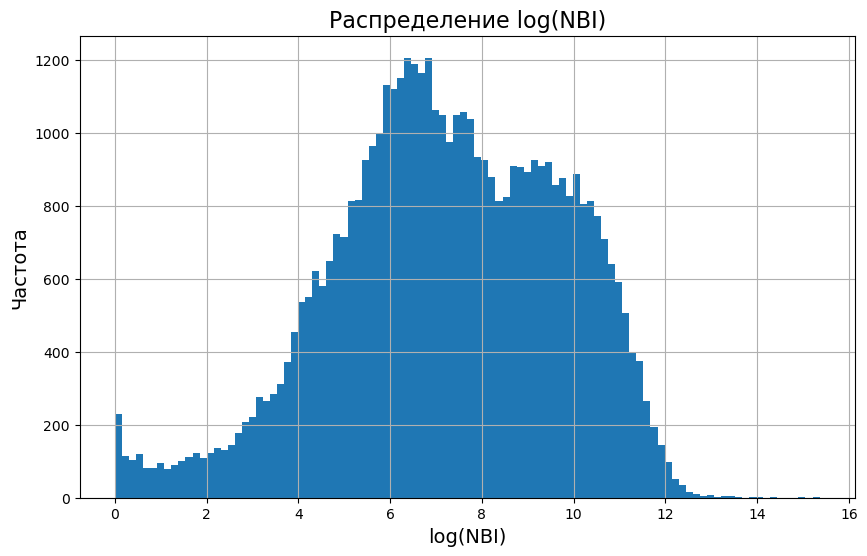

In [16]:
df['log_nbi'] = np.log(df['nbi'] +1)

df['log_nbi'].hist(bins=100, figsize=(10,6))
plt.title('Распределение log(NBI)', fontsize=16)
plt.xlabel('log(NBI)', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.show()

# Кластеризация

In [19]:
df['log_loan_balance_0m'] = np.log(df['loan_balance_0m'] + 1)

In [21]:
# Оставляем только нужные переменные
features = ['log_loan_balance_0m', 'log_income', 'log_dc_trx_sum']

# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

In [115]:
X.shape

(50000, 3)

In [117]:
# --- Кластеризация DBSCAN ---
dbscan = DBSCAN(eps=0.4, min_samples=80)
df['cluster'] = dbscan.fit_predict(X)

In [118]:
df['cluster'].unique()

array([ 0,  1,  2,  3,  4,  5,  6, -1])

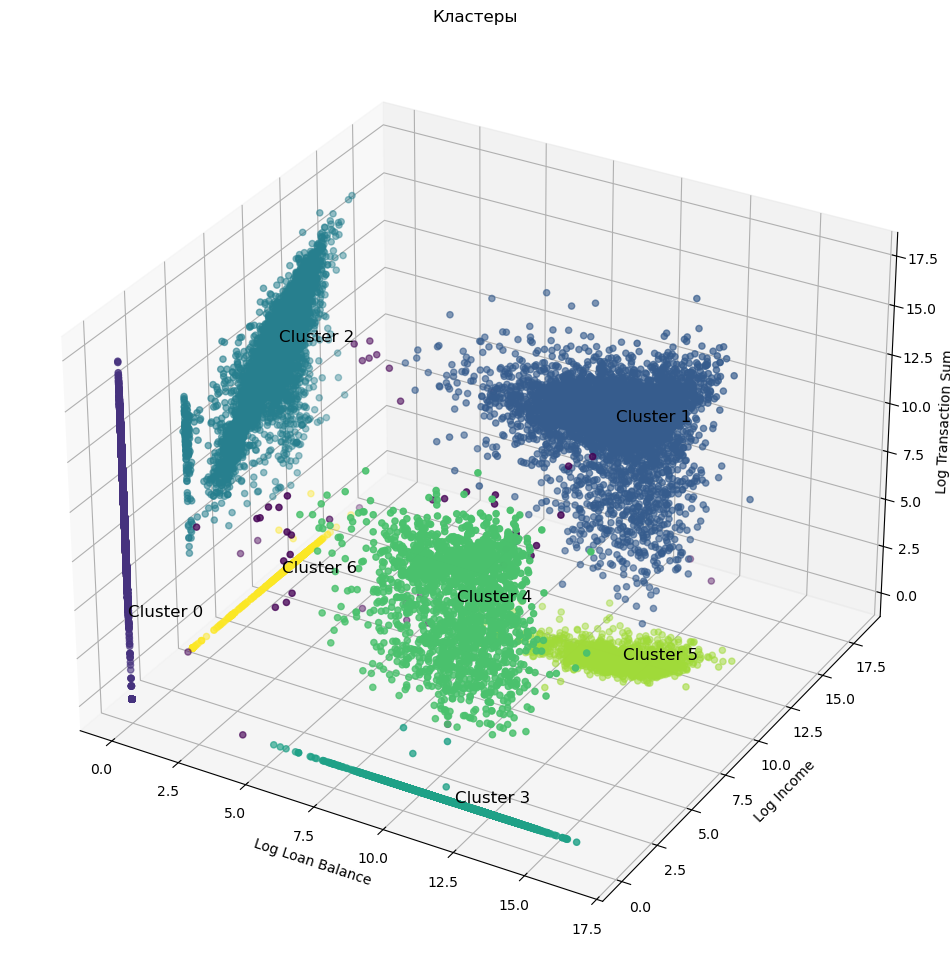

In [119]:
# 3D график
fig = plt.figure(figsize=(12, 18))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['log_loan_balance_0m'], df['log_income'], df['log_dc_trx_sum'], c=df['cluster'], cmap='viridis')

for cluster_id in df['cluster'].unique():
    if cluster_id != -1:
        cluster_points = df[df['cluster'] == cluster_id]
        center = cluster_points[['log_loan_balance_0m', 'log_income', 'log_dc_trx_sum']].mean()
        ax.text(center['log_loan_balance_0m'], center['log_income'], center['log_dc_trx_sum'],
                f'Cluster {cluster_id}', size=12, color='black')

ax.set_xlabel('Log Loan Balance')
ax.set_ylabel('Log Income')
ax.set_zlabel('Log Transaction Sum')
ax.set_title('Кластеры')

plt.show()

DBSCAN нам выделил 7 кластеров клиентов.

* Кластер 0: Клиенты без кредитного баланса, без дохода, но с активными транзакциями

     Для этих клиентов можно предложить небольшие кредитные продукты или карты с кэшбэком, чтобы привлечь их к использованию кредитов.
* Кластер 3: Клиенты с положительным кредитным балансом, но без доходов и транзакций
  
  Нужно предложить программы рефинансирования или реструктуризации долга, а также оценить возможности для кредитования под залог, если это необходимо.
* Кластер 6: Клиенты с положительным доходом, но без транзакций и кредитного баланса

  Можно предложить этим клиентам программы, направленные на создание кредитной истории, например, кредитные карты с низким лимитом, или продукты для сбережений и инвестиционные решения.

Ниже график более ясно показал это

п.с. Фииолетовые точки это выбросы ( кластер "-1")

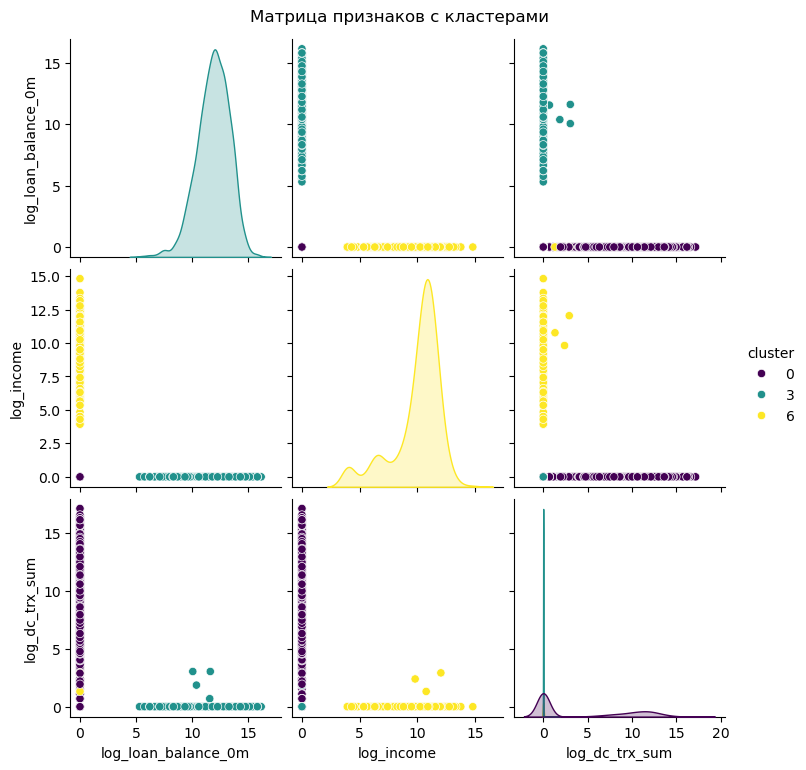

In [121]:
sns.pairplot(df.query('cluster in (0,3,6)'), hue='cluster', vars=['log_loan_balance_0m', 'log_income', 'log_dc_trx_sum'], palette='viridis')
plt.suptitle('Матрица признаков с кластерами', y=1.02)
plt.show()

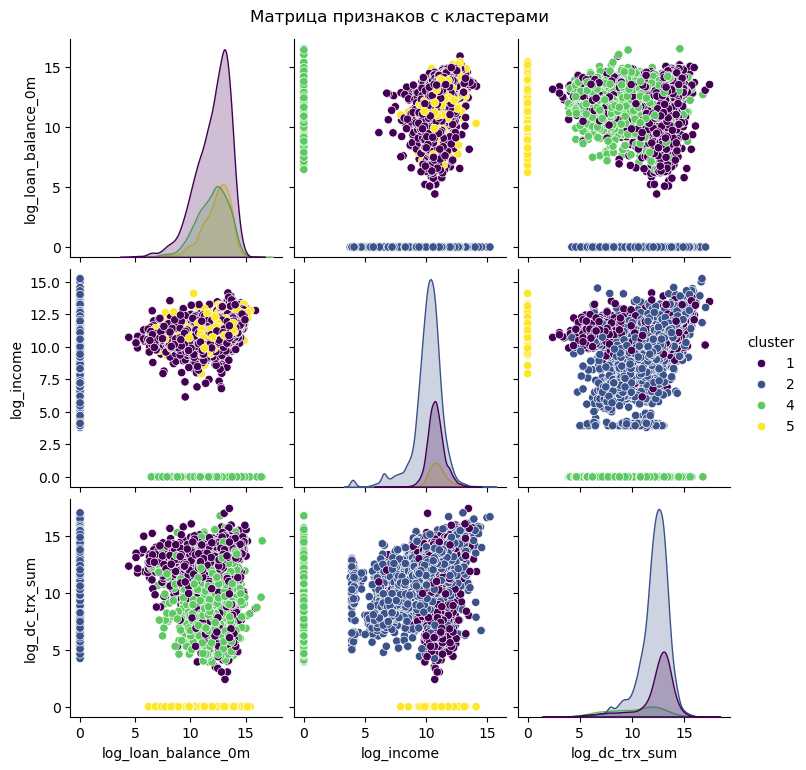

In [122]:
sns.pairplot(df.query('cluster not in (-1, 0,3,6)'), hue='cluster', vars=['log_loan_balance_0m', 'log_income', 'log_dc_trx_sum'], palette='viridis')
plt.suptitle('Матрица признаков с кластерами', y=1.02)
plt.show()

- Кластер 1: Активные клиенты с положительными кредитными балансами и доходами, а также транзакциями

  Эти клиенты могут быть заинтересованы в расширенных кредитных продуктах, таких как увеличение лимитов по существующим кредитам или предложениях на новые кредитные карты с бонусами, скидками или кэшбэком.
- Кластер 2: Клиенты с отсутствием кредитного баланса, но с доходами и транзакциями

  Для этих клиентов можно предложить стартовые кредитные продукты, такие как небольшие кредиты или кредитные карты с низкими лимитами для создания кредитной истории. Возможно, стоит предложить им продукты с возможностью увеличить кредитный лимит по мере роста их финансовой активности.
- Кластер 4: Клиенты с положительным кредитным балансом, доходом но без транзакционных трат
  
    Для этого кластера можно предложить продукты, стимулирующие использование кредитных карт, такие как кредитные карты с бонусами, кэшбэком или льготным периодом
- Кластер 5: Клиенты с положительными поступлениями и кредитным балансом, но без транзакционных трат

   Можно предложить этим клиентам более выгодные условия по кредитам или кредитные карты с привлекательными бонусами и акциями. Также стоит предложить продукты для управления личными финансами и сбережениями.
  

# Cluster in product

В предыдущем разделе мы провели кластеризацию клиентов, используя общие категории и признаки. Теперь, опираясь на эти данные, можно более детально сегментировать клиентов по продуктам, которые предоставляет банк. Для каждого продукта мы определим признаки, которые помогут в дальнейшем строить более точные сегменты и, при необходимости, разрабатывать модели для прогнозирования.

Разделим данные на продуктовые категории, в рамках которых будем выполнять сегментацию:

- **Кредиты**  
- **Депозиты**  
- **Транзакционная активность**

В рамках каждой категории мы выделим ключевые признаки, которые позволят нам точно охарактеризовать поведение клиентов и предложить им оптимальные финансовые продукты.

## Кредиты

Рассмотрим для начала долговые метрики, корреляции в данных, аномалии и т.д.



In [123]:
df.query('ml_balance  != 0').shape
# 574 клиента с ипотекой, они войдут в отдельную подкатегорию.

(574, 35)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

In [125]:
df[['loan_balance_0m','min_loan_balance_1q', 'max_loan_balance_1q', 'avg_loan_balance_1Y']].sample(3)

,loan_balance_0m,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y
16567,0.00,0.00,0.00,0.00000
4822,807761.48,807761.48,830191.87,730205.85583
21918,109393.59,109393.59,123126.28,144494.08333


Отберем клиентов с кредитами

In [23]:
print(df.query('loan_balance_0m > 0').shape)
print(df.query('min_loan_balance_1q > 0').shape)
print(df.query('max_loan_balance_1q > 0').shape)
print(df.query('avg_loan_balance_1Y > 0').shape)

(11156, 34)
(10417, 34)
(12020, 34)
(13132, 34)


In [25]:
df.query('avg_loan_balance_1Y > 0 & min_loan_balance_1q > 0 & max_loan_balance_1q > 0 & avg_loan_balance_1Y > 0 & ml_balance  == 0').shape

(9843, 34)

9843 клиентов именно столько полных данных клиентов, с которыми  можем работать.

In [28]:
df_credit = df.query('avg_loan_balance_1Y > 0 & min_loan_balance_1q > 0 & max_loan_balance_1q > 0 & avg_loan_balance_1Y > 0')

In [30]:
# Добавление дельты квартального баланса
df_credit['loan_delta_1q'] = df_credit['max_loan_balance_1q'] - df_credit['min_loan_balance_1q']

# Отклонение от среднего годового баланса
df_credit['loan_diff_avg'] = df_credit['loan_balance_0m'] - df_credit['avg_loan_balance_1Y']

# Разница в балансе
df_credit['balance_diff'] = df_credit['loan_balance_0m'] - df_credit['min_loan_balance_1q']

# Отношение максимального квартального баланса к среднему годовому
df_credit['loan_max_to_avg'] = df_credit['max_loan_balance_1q'] / df_credit['avg_loan_balance_1Y']

# Отношение текущего баланса к максимальному квартальному
df_credit['loan_current_to_max'] = df_credit['loan_balance_0m'] / df_credit['max_loan_balance_1q']

# Отношение кредита к доходу
df_credit['loan_to_income'] = df_credit['loan_balance_0m'] / df_credit['income']

df_credit['loan_to_income'] = df_credit['loan_to_income'].replace([np.inf, -np.inf], np.nan)
df_credit['loan_to_income'] = df_credit['loan_to_income'].fillna(df_credit['loan_to_income'].median())

In [32]:
df_credit.columns

Index(['age', 'gender', 'city_type', 'full_mob', 'ml_balance', 'cl_balance_0m',
       'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m', 'dc_trx_cnt',
       'dc_trx_sum', 'income', 'min_casa_balance_1q', 'max_casa_balance_1q',
       'avg_casa_balance_1Y', 'min_td_balance_1q', 'max_td_balance_1q',
       'avg_td_balance_1Y', 'min_loan_balance_1q', 'max_loan_balance_1q',
       'avg_loan_balance_1Y', 'min_cl_balance_1q', 'max_cl_balance_1q',
       'avg_cl_balance_1Y', 'loan_to_deposit', 'Avg_trx', 'avgtrx_to_balance',
       'nbi', 'log_income', 'log_dc_trx_sum', 'log_Avg_trx', 'log_dc_trx_cnt',
       'log_nbi', 'log_loan_balance_0m', 'loan_delta_1q', 'loan_diff_avg',
       'balance_diff', 'loan_max_to_avg', 'loan_current_to_max',
       'loan_to_income'],
      dtype='object')

In [40]:
features = ['log_loan_balance_0m', 'log_income', 'log_dc_trx_sum', 
            'log_dc_trx_cnt', 'log_nbi', 'loan_to_income',
            'loan_delta_1q', 'loan_diff_avg', 'balance_diff', 
            'loan_max_to_avg', 'loan_current_to_max']

In [42]:
scaled_data = StandardScaler().fit_transform(df_credit[features].dropna())

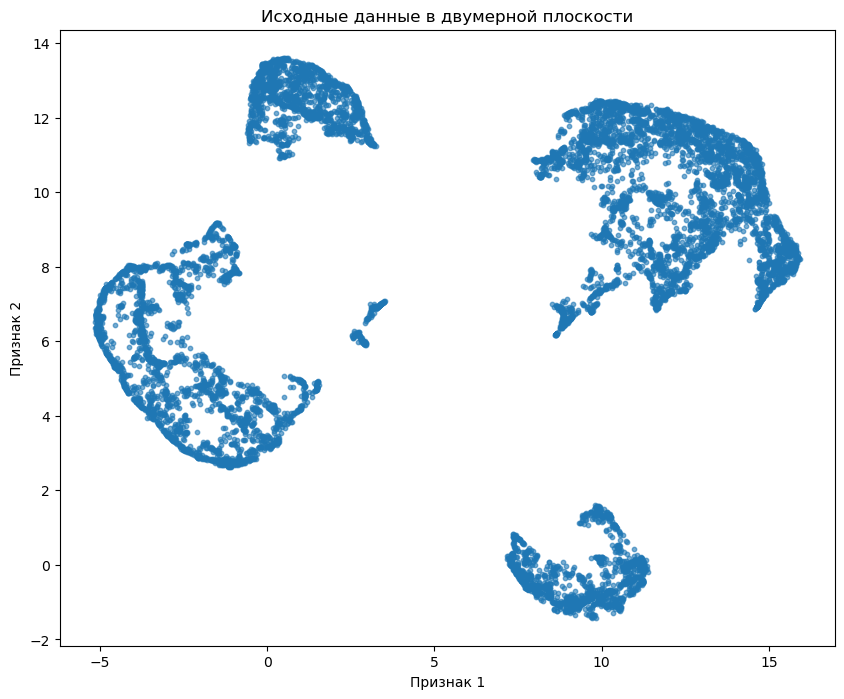

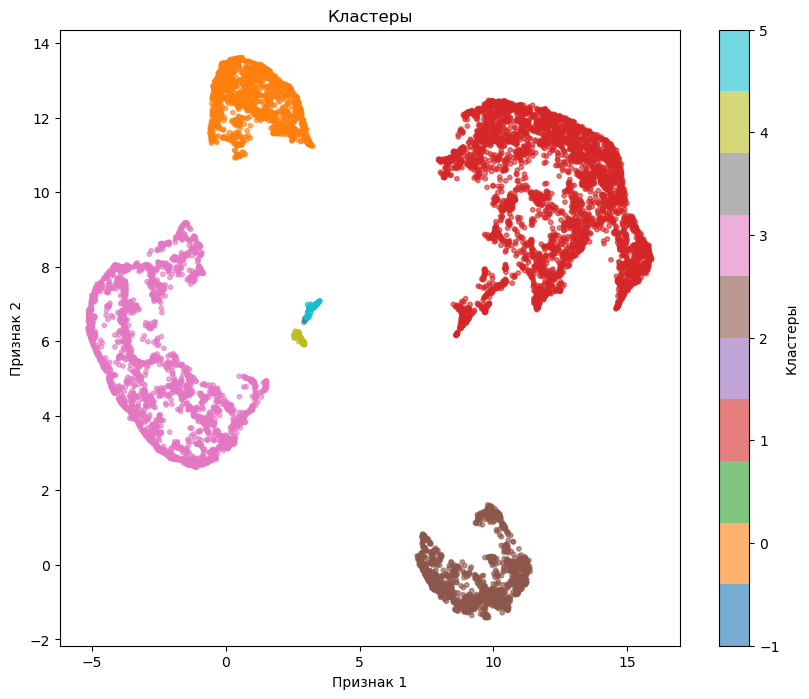

In [55]:
# Cнижаем размерность нашего признакостного пространства до двуменой плоскости
reducer = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2, random_state=42)
embedding = reducer.fit_transform(scaled_data)

# Визуализация исходных данных
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], s=10, cmap='viridis', alpha=0.6)
plt.title('Исходные данные в двумерной плоскости')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

# Применяем HDBSCAN для кластеризации
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=30).fit(embedding)

# Визуализация сегментированных данных
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=hdbscan_model.labels_, cmap='tab10', s=10, alpha=0.6)
plt.colorbar(label="Кластеры")
plt.title('Кластеры')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()